In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from colicoords import load, save, CellPlot, CellListPlot
from tqdm.auto import tqdm

In [27]:
ph = 10000

In [ ]:
conditions = ['raw', 'binary', 'brightfield', 'storm_inner']

In [6]:
cond = 'binary'

In [28]:
with open(f'matched_names/m_cells_ph_{ph}_match_filter.txt', 'r') as f:
    m_names = f.readlines()
    
m_names = list([n.rstrip() for n in m_names])

In [32]:
with open(f'matched_names/gt_cells_ph_{ph}_match_filter.txt', 'r') as f:
    gt_names = f.readlines()

gt_names = list([n.rstrip() for n in gt_names])

In [4]:
gt_cells = load('cell_obj/cells_final_selected.hdf5')

In [29]:
m_cells = load(f'cell_obj/cell_ph_{ph}_filtered.hdf5')

In [ ]:
len(m_names)

In [33]:
out_dict = {
    'storm_inner_m': [],
    'storm_inner_gt': [],
    'storm_outer_m': [],
    'storm_outer_gt': [],
}

for m_name, gt_name in tqdm(zip(m_names, gt_names), total=len(m_names)):
    m_i = m_cells.name.tolist().index(m_name)
    gt_i = gt_cells.name.tolist().index(gt_name)
    
    m_c = m_cells[m_i]
    gt_c = gt_cells[gt_i] 
    
    for elem_name in ['storm_inner', 'storm_outer']:
        m_r = m_c.coords.calc_rc(m_c.data.data_dict[elem_name]['x'],m_c.data.data_dict[elem_name]['y'])
        gt_r = gt_c.coords.calc_rc(gt_c.data.data_dict[elem_name]['x'],gt_c.data.data_dict[elem_name]['y'])
    
        out_dict[elem_name + '_m'].append(m_r)
        out_dict[elem_name + '_gt'].append(gt_r)

In [34]:
m_r_full = np.concatenate(out_dict['storm_inner_m'])
gt_r_full = np.concatenate(out_dict['storm_inner_gt'])

In [48]:
gt_r_full1 = np.concatenate(out_dict['storm_outer_gt'])

In [21]:
for k, v in out_dict.items():
    np.savetxt(k + '_' + str(ph) + '.txt', v)

(3192097,)

In [36]:
gt_r_full.shape

(3581511,)

<IPython.core.display.Javascript object>


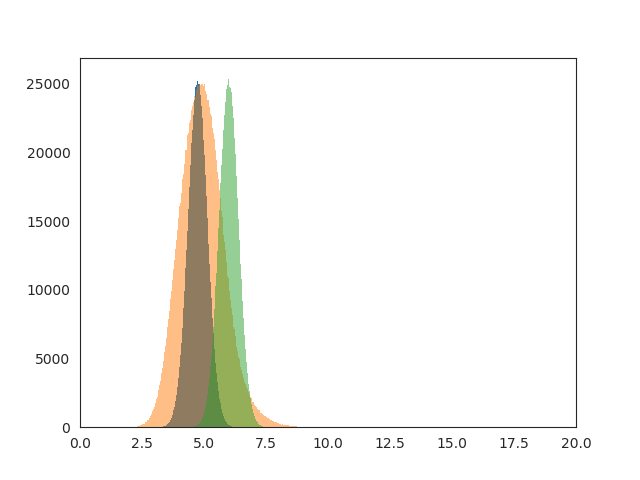

(0, 20)

In [49]:
plt.figure()
h = plt.hist(gt_r_full, bins='fd', linewidth=0)
h = plt.hist(m_r_full, bins='fd', linewidth=0, alpha=0.5)
h = plt.hist(gt_r_full1, bins='fd', linewidth=0, alpha=0.5)

plt.xlim(0, 20)

<IPython.core.display.Javascript object>


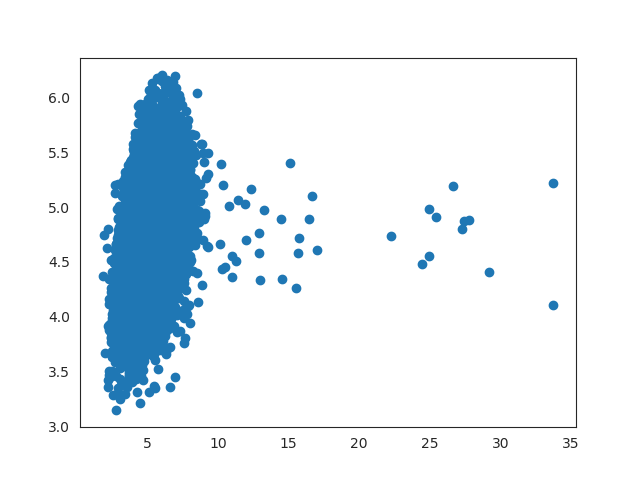

In [40]:
plt.figure()
plt.scatter(m_r_full[::100], gt_r_full[::100])

In [37]:
import seaborn as sns


<IPython.core.display.Javascript object>


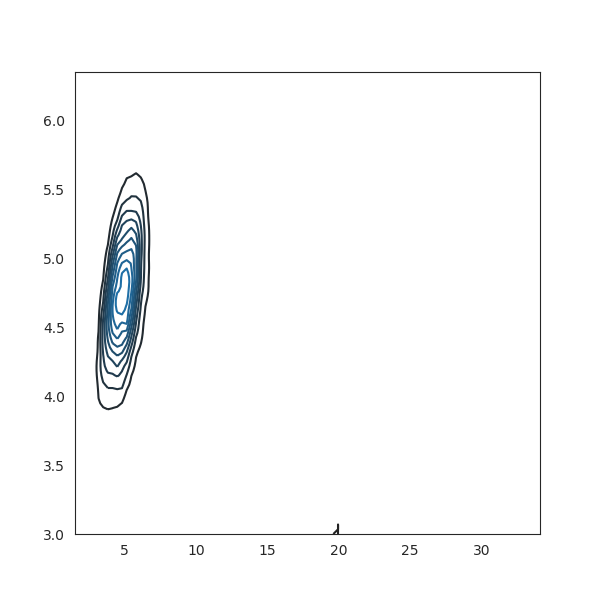

In [39]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(m_r_full[::100], gt_r_full[::100], ax=ax)